In [116]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from matplotlib import pyplot as plt

## Preprocessing

In [57]:
filepath = os.path.join('data', 'breast-cancer-wisconsin.data')
df = pd.read_csv(filepath)
df.head()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [58]:
print('Benign cases: ' + str(len(df[df['class']==2])))
print('Malignant cases: ' + str(len(df[df['class']==4])))

Benign cases: 458
Malignant cases: 241


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   cell_size_uniformity         699 non-null    int64 
 3   cell_shape_uniformity        699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [60]:
df['bare_nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

#### Dropping the records with missing data

In [61]:
df = df[df['bare_nuclei'] != "?"]

##### Dividing the DataFrame into features and classes, dropping the unnecessary 'id' column

In [65]:
X = df.drop(['id', 'class'], axis=1)
y = df['class']

11

## Feature selection

In [113]:
def plot_features(ranked_features):
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(ranked_features)), [value for _, value in ranked_features.items()], align='center')
    plt.yticks(range(len(ranked_features)), [key for key in ranked_features])
    plt.xlabel('Numeric ranking')
    plt.ylabel('Feature names')
    plt.show()

In [96]:
def rank_and_select(X, y, num_of_features, func):
    sel = SelectKBest(score_func=func, k=num_of_features)
    sel.fit(X, y)
    print('X shape after applying feature selection: ', sel.transform(X).shape)
    ranked_features = {feature: round(value, 3) for feature, value in zip(X.columns, sel.scores_)}
    ranked_features = dict(sorted(ranked_features.items(), key=lambda a: a[1], reverse=True))
    print('Features ranking: ')
    for i, item in enumerate(ranked_features.items()):
        print(str(i) + '.', item)
    plot_features(ranked_features)
    return ranked_features

X shape after applying feature selection:  (683, 9)
Features ranking: 
0. ('bare_nuclei', 1729.066)
1. ('cell_size_uniformity', 1370.065)
2. ('cell_shape_uniformity', 1279.768)
3. ('normal_nucleoli', 1143.867)
4. ('marginal_adhesion', 986.418)
5. ('bland_chromatin', 682.978)
6. ('clump_thickness', 624.136)
7. ('single_epithelial_cell_size', 497.537)
8. ('mitoses', 228.994)


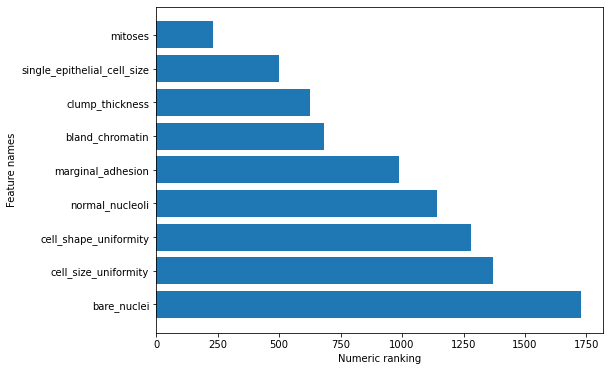

In [118]:
ranked_features = rank_and_select(X, y, X.shape[1], chi2)